### import the libraries


In [2]:
! pip install nltk

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk


### Import the DataSet

In [4]:
df = pd.read_csv("D:/GAURAV NOTES/notes 1965/DataSet/Sentiment/sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [6]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [11]:
df.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object

In [13]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [14]:
df.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object

###  Visualization

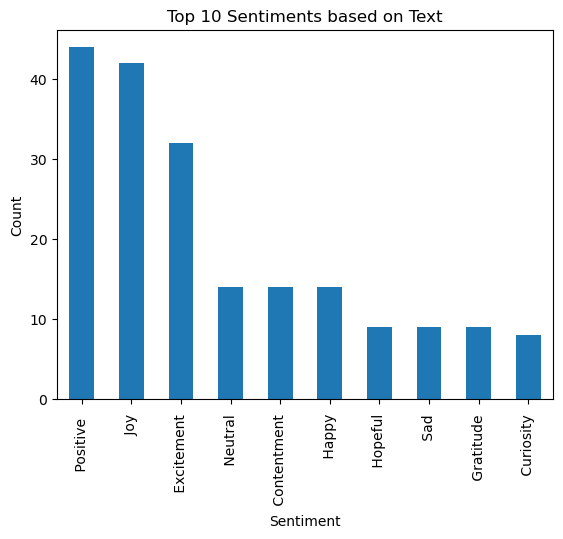

In [17]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')

plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

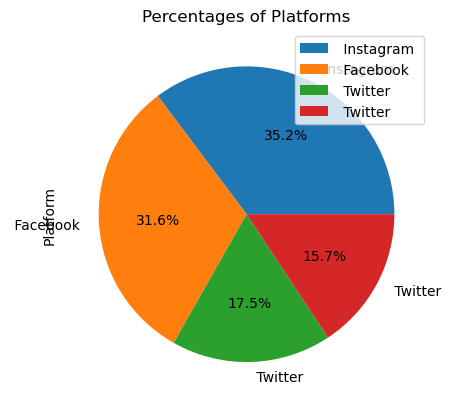

In [18]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

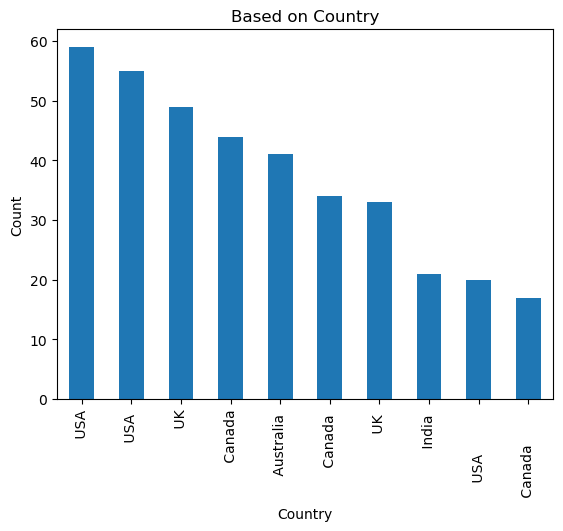

In [19]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Based on Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

### Text Preprocessing

In [20]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Assuming 'Text' is the column containing text data in your DataFrame
# Replace 'df' with your actual DataFrame name

# Download NLTK resources (only needed once)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [23]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def process_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english')) | ENGLISH_STOP_WORDS
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join tokens back into a string
    processed_text = ' '.join(tokens)
    
    return processed_text
df['processed_text'] = df['Text'].apply(process_text)
print(df[['Text', 'processed_text']].head())

                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                   processed_text  
0         enjoy beauti day park !  
1          traffic terribl morn .  
2         finish amaz workout ! 💪  
3   excit upcom weekend getaway !  
4  tri new recip dinner tonight .  


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming 'processed_text' is the column you created after text preprocessing
# Replace 'df' with your actual DataFrame name

vectorizer = CountVectorizer(binary=True)
dtm_boolean = vectorizer.fit_transform(df['processed_text'])
dtm_boolean_df = pd.DataFrame(dtm_boolean.toarray(), columns=vectorizer.get_feature_names_out())

# Display the resulting DataFrame
print(dtm_boolean_df.head())


   ablaz  abstract  abyss  academ  accept  accident  accomplish  ach  achiev  \
0      0         0      0       0       0         0           0    0       0   
1      0         0      0       0       0         0           0    0       0   
2      0         0      0       0       0         0           0    0       0   
3      0         0      0       0       0         0           0    0       0   
4      0         0      0       0       0         0           0    0       0   

   acoust  ...  writinggroup  wrong  year  yearbook  yearn  york  young  zen  \
0       0  ...             0      0     0         0      0     0      0    0   
1       0  ...             0      0     0         0      0     0      0    0   
2       0  ...             0      0     0         0      0     0      0    0   
3       0  ...             0      0     0         0      0     0      0    0   
4       0  ...             0      0     0         0      0     0      0    0   

   zero  zest  
0     0     0  
1     

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

,ablaz,abstract,abyss,academ,accept,accident,accomplish,ach,achiev,acoust,...,writinggroup,wrong,year,yearbook,yearn,york,young,zen,zero,zest
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'processed_text' and 'Sentiment' are the column names in your DataFrame
# Replace 'df' with your actual DataFrame name

X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['Sentiment'], test_size=0.2, random_state=42)

text_classifier_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=7000)),  # You can adjust max_features as needed
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Use RandomForestClassifier
])

text_classifier_pipeline.fit(X_train, y_train)

predictions = text_classifier_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)


Accuracy: 0.29
Classification Report:
                         precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
         Admiration          0.00      0.00      0.00         0
        Admiration           0.00      0.00      0.00         1
         Affection           0.00      0.00      0.00         1
      Ambivalence            1.00      1.00      1.00         1
         Anger               0.00      0.00      0.00         1
         Anticipation        0.00      0.00      0.00         0
        Anticipation         0.00      0.00      0.00         1
        Arousal              1.00      0.33      0.50         3
        ArtisticBurst        0.00      0.00      0.00         0
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1


D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall 

In [31]:
text_classifier_pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # You can adjust max_features as needed
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # You can adjust parameters
])
text_classifier_pipeline_rf.fit(X_train, y_train)

predictions = text_classifier_pipeline_rf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)


Accuracy: 0.29
Classification Report:
                         precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
         Admiration          0.00      0.00      0.00         0
        Admiration           0.00      0.00      0.00         1
         Affection           0.00      0.00      0.00         1
      Ambivalence            1.00      1.00      1.00         1
         Anger               0.00      0.00      0.00         1
         Anticipation        0.00      0.00      0.00         0
        Anticipation         0.00      0.00      0.00         1
        Arousal              1.00      0.33      0.50         3
        ArtisticBurst        0.00      0.00      0.00         0
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1


D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall 